In [9]:
import numpy as np
import math

In [60]:
class sol_1():

    def __init__(self) -> None:
        self.L = 0.25 # same link lengths for all the links
        self.J = []
        pass

    def stanford(self,corners):
        J = [] #  list of joint variables for A,B,C,D
        L = self.L
        # Inverse Kinematics
        for i in corners:
            r = math.sqrt(i[0]**2 + i[1]**2)
            s = i[2] - L
            theta_1 = math.atan2(i[1],i[0])
            theta_2 = math.atan2(s,r)
            d_3 = math.sqrt(r**2+s**2)-L
            j = [theta_1, theta_2, d_3]
            J.append(j)
        print(J) # Note that the angles are in radians 

        # Forward Kinematics
        P = [] # list of end-effector positions for A,B,C,D
        for i in J:
            z = L + (L + i[2])*np.sin(i[1])
            y = (L + i[2])*np.cos(i[1])*np.sin(i[0])
            x = (L + i[2])*np.cos(i[1])*np.cos(i[0])
            p = [x,y,z]
            P.append(p)
        print(P)
        self.J = J
        pass

    def PUMA(self,corners):
        L = self.L
        J = [] 
        # Inverse Kinematics
        d_1 = 0 # joint offset is assumed to be zero
        for i in corners:
            theta_1 = math.atan2(i[1],i[0])
            D = (i[0]**2 + i[1]**2 + (i[2] - L)**2 - 2*L**2)/(2*L**2)
            theta_3 = math.atan2(math.sqrt(1 - D**2),D)
            r = math.sqrt(i[0]**2 + i[1]**2)
            s = i[2] - L
            theta_2 = math.atan2(s,r) - math.atan2(L*math.sin(theta_3),L*(1 + math.cos(theta_3)))
            j = [theta_1, theta_2, theta_3] 
            J.append(j)
        print(J)
        # Forward Kinematics
        P = [] # list of end-effector positions for A,B,C,D
        for i in J:
            z = L*math.sin(i[2]+i[1]) + L*math.sin(i[1]) + L
            y = (L*math.cos(i[2]+i[1]) + L*math.cos(i[1]))*math.sin(i[0])
            x = (L*math.cos(i[2]+i[1]) + L*math.cos(i[1]))*math.cos(i[0])
            p = [x,y,z]
            P.append(p)
        print(P)
        self.J = J
        pass

    def SCARA(self,corners):
        L = self.L
        J = [] 

        # Inverse Kinematics
        for i in corners:
            theta_2 = math.acos((i[0]**2 + i[1]**2 - 2*L**2)/2*L**2)
            beta = math.atan2(i[1],i[0])
            theta_1 = beta - math.atan2(L*math.sin(theta_2),L*(1 + math.cos(theta_2)))
            d = i[2] - L
            j = [theta_1, theta_2, d]
            J.append(j)
        print(J)
        P = []
        # Forward Kinematics
        for i in J:
            x = L*math.cos(i[0]+i[1]) + L*math.cos(i[0])
            y = L*math.sin(i[0]+i[1]) + L*math.sin(i[0])
            z = L + i[2]
            p = [x,y,z]
            P.append(p)
        print(P)
        self.J = J
        pass

    def callJ(self):
        return self.J
        

In [35]:
# Given workspace corners
A = [0.45, 0.075, 0.1]
B = [0.45, -0.075, 0.1]
C = [0.25, -0.075, 0.1]
D = [0.25, 0.075, 0.1]

corners = [A,B,C,D] 
solution = sol_1()

# 1(a) - Stanford-type RRP Manipulator
solution.stanford(corners)

[[0.16514867741462683, -0.31766319298226053, 0.23023431780746362], [-0.16514867741462683, -0.31766319298226053, 0.23023431780746362], [-0.2914567944778671, -0.5216056136891403, 0.051039864469807406], [0.2914567944778671, -0.5216056136891403, 0.051039864469807406]]
[[0.44999999999999996, 0.07499999999999998, 0.10000000000000003], [0.44999999999999996, -0.07499999999999998, 0.10000000000000003], [0.25, -0.07500000000000001, 0.1], [0.25, 0.07500000000000001, 0.1]]


In [20]:
# 1(a) - PUMA-type RRR Manipulator
solution.PUMA(corners)

[[0.16514867741462683, -0.5997787728460515, 0.564231159727582], [-0.16514867741462683, -0.5997787728460515, 0.564231159727582], [-0.2914567944778671, -1.4462986282824137, 1.8493860291865472], [0.2914567944778671, -1.4462986282824137, 1.8493860291865472]]
[[0.45000000000000007, 0.07500000000000001, 0.1], [0.45000000000000007, -0.07500000000000001, 0.1], [0.25, -0.07500000000000001, 0.10000000000000003], [0.25, 0.07500000000000001, 0.10000000000000003]]


In [24]:
# 1(a) SCARA-type RRP Manipulator
solution.SCARA(corners)

[[-0.6189506563971078, 1.5681986676234692, -0.15], [-0.9492480112263614, 1.5681986676234692, -0.15], [-1.0777436302181944, 1.5725736714806549, -0.15], [-0.49483004126246033, 1.5725736714806549, -0.15]]
[[0.349195579564178, 0.05819926326069633, 0.1], [0.349195579564178, -0.05819926326069633, 0.1], [0.33834165463038623, -0.10150249638911583, 0.1], [0.33834165463038623, 0.10150249638911585, 0.1]]


In [25]:
# 1(b)
A = [float(i) for i in input("Enter Coordinates for Corner A: ").split()]
B = [float(i) for i in input("Enter Coordinates for Corner B: ").split()]
C = [float(i) for i in input("Enter Coordinates for Corner C: ").split()]
D = [float(i) for i in input("Enter Coordinates for Corner D: ").split()]
corners = [A,B,C,D]
count = 0
# Checking if the given points are in the workspace
for i in corners:
    if i[0] > 0.45 or i[0] <0.25 or i[1] < -0.075 or i[1] > 0.075 or i[2] != 0.1: 
        print("Values NOT in workspace!")
        break
    else:
        count += 1
if count == 4:
    print("Stanford")
    solution.stanford(corners)
    solution.PUMA(corners)
    solution.SCARA(corners)

[[0.14888994760949723, -0.3551283547555233, 0.18139309220245986], [-0.14888994760949723, -0.3551283547555233, 0.18139309220245986], [0.19739555984988075, -0.45584975089376795, 0.09073450074801642], [-0.19739555984988075, -0.45584975089376795, 0.09073450074801642]]
[[0.4, 0.06, 0.1], [0.4, -0.06, 0.1], [0.3, 0.06, 0.1], [0.3, -0.06, 0.1]]
[[0.14888994760949723, -0.8851696682987094, 1.0600826270863724], [-0.14888994760949723, -0.8851696682987094, 1.0600826270863724], [0.19739555984988075, -1.2768780617932423, 1.6420566217989487], [-0.19739555984988075, -1.2768780617932423, 1.6420566217989487]]
[[0.4, 0.06, 0.10000000000000009], [0.4, -0.06, 0.10000000000000009], [0.3, 0.06, 0.10000000000000003], [0.3, -0.06, 0.10000000000000003]]
[[-0.6359050906416892, 1.569590076502373, -0.15], [-0.9336849858606837, 1.569590076502373, -0.15], [-0.5884932286263007, 1.571777576952363, -0.15], [-0.9832843483260623, 1.571777576952363, -0.15]]
[[0.34985261479405816, 0.0524778922191087, 0.1], [0.3498526147940

In [26]:
# 1(c)
A = [0.40,0.06,0.1]; B = [0.40,0.01,0.1]; C = [0.35,0.01,0.1]; D = [0.40,0.06,0.1]
corners = [A,B,C,D]
count = 0
# Checking if the given points are in the workspace
for i in corners:
    if i[0] > 0.45 or i[0] <0.25 or i[1] < -0.075 or i[1] > 0.075 or i[2] != 0.1: 
        print("Values NOT in workspace!")
        break
    else:
        count += 1
if count == 4:
    print("Stanford")
    solution.stanford(corners)
    print("PUMA")
    solution.PUMA(corners)
    print("SCARA")
    solution.SCARA(corners)


Stanford
[[0.14888994760949723, -0.3551283547555233, 0.18139309220245986], [0.02499479361892016, -0.3586679747243447, 0.17731721238443], [0.028563657838759998, -0.40474408410386636, 0.13091993909481814], [0.14888994760949723, -0.3551283547555233, 0.18139309220245986]]
[[0.4, 0.06, 0.1], [0.4000000000000001, 0.010000000000000002, 0.1], [0.35, 0.01, 0.1], [0.4, 0.06, 0.1]]
PUMA
[[0.14888994760949723, -0.8851696682987094, 1.0600826270863724], [0.02499479361892016, -0.9046179420290408, 1.0918999346093923], [0.028563657838759998, -1.1093916739127891, 1.4092951796178457], [0.14888994760949723, -0.8851696682987094, 1.0600826270863724]]
[[0.4, 0.06, 0.10000000000000009], [0.4000000000000001, 0.010000000000000002, 0.10000000000000003], [0.35, 0.01, 0.10000000000000003], [0.4, 0.06, 0.10000000000000009]]
SCARA
[[-0.6359050906416892, 1.569590076502373, -0.15], [-0.7598549321685539, 1.5696994515749483, -0.15], [-0.7568720055587234, 1.5708713267949668, -0.15], [-0.6359050906416892, 1.56959007650237

In [57]:
# 1 (e) and 1(f) PUMA-type
import math
# Since the negative z-axis 
A = [0.40,0.06,0.1]; B = [0.40,0.01,0.1]; C = [0.35,0.01,0.1]; D = [0.40,0.06,0.1] # Coordinates of Task 1(c)
corners = [A,B,C,D]

J = solution.callJ()
r_13 = 0 ; r_23 = 0 ; r_33 = -1 ; # Since the tool points in negative z direction
r_12 = r_21 = 0 ; r_11 = 1 ; r_22 = -1 # The overall rotation of the matrix is assumed to be about x-axis by 180 degrees => R_0_6 = []
J_new = []
wrist_angles = []
# From example 4.4.1 of Textbook (Articulated Manipulator with Spherical Wrist)

for i in range(len(J)):
    theta_4 = math.atan2(-math.cos(J[i][0])*math.sin(J[i][1]+J[i][2])*r_13 - math.sin(J[i][0])*math.sin(J[i][1]+J[i][2])*r_23 - math.cos(J[i][1])+J[i][2]*r_33,     math.cos(J[i][0])*math.cos(J[i][1]+J[i][2])*r_13 + math.sin(J[i][0])*math.cos(J[i][1]+J[i][2])*r_23 - math.sin(J[i][1])+J[i][2]*r_33)
    theta_5 = math.atan2(math.sqrt(1-(math.sin(J[i][0])*r_13 - math.cos(J[i][0])*r_23)**2),math.sin(J[i][0])*r_13 - math.cos(J[i][0]*r_23))
    theta_6 = math.atan2(math.sin(J[i][0])*r_12 + math.cos(J[i][0])*r_22 ,math.sin(J[i][0])*r_11 - math.cos(J[i][0])*r_21)
    j_new = [J[i][0], J[i][1], J[i][2], theta_4, theta_5, theta_6]
    J_new.append(j_new)
    wrist = [theta_4,theta_5,theta_6]
    wrist_angles.append(wrist)
print('New Joint Variables',J_new)
print('Wrist Angles', wrist_angles)


[[0.14888994760949723, -0.8851696682987094, 1.0600826270863724, -1.7381584312424916, 2.356194490192345, -1.4219063791853994], [0.02499479361892016, -0.9046179420290408, 1.0918999346093923, -1.7477171751964238, 2.356194490192345, -1.5458015331759765], [0.028563657838759998, -1.1093916739127891, 1.4092951796178457, -1.8411062268912195, 2.356194490192345, -1.5422326689561365], [0.14888994760949723, -0.8851696682987094, 1.0600826270863724, -1.7381584312424916, 2.356194490192345, -1.4219063791853994]]
0.7071067811865476


In [76]:
# 1 (e) and 1(f) SCARA-type RRP Manipulator and Stanford Type Manipulator
# R_3_6 = rotation matrix corresponding to the spherical wrist = (R_0_3)'R = U where
# R_0_3 = rotation matrix corresponding to SCARA manipulator and R = rotation matrix from base frame to tool frame
def Spherical_Wrist(U):
    if U[0][2]!=0 or U[1][2]!=0 :
        i = int(input("Enter 1 for sin_theta > 0 or 0 for sin_theta <0 :"))
        if i == 1:
            theta = math.atan2(math.sqrt(1-U[2][2]**2),U[2][2])
            phi = math.atan2(U[1][2],U[0][2])
            psi = math.atan2(U[2][1],-U[2][0])
        elif i == 0:
            theta = math.atan2(-math.sqrt(1-U[2][2]**2),U[2][2])
            phi = math.atan2(-U[1][2],-U[0][2])
            psi = math.atan2(-U[2][1],U[2][0])
        else:
            print("error")
    else:
        if U[2][2] == 1:
            theta = 0 # from U[2][2] = 1 
            phi_plus_psi = math.atan2(U[1][0],U[0][0]) # infinite solutions exist
            phi = 0; # in order to get a unique solution
            psi = phi_plus_psi - phi
        elif U[2][2] == -1:
            theta = math.pi # from U[2][2] = -1
            phi_minus_psi = math.atan2(-U[0][1],-U[0][0]) # infinite solutions exist
            phi = 0 # in order to get a unique solution
            psi = phi - phi_minus_psi
        else:
            print("error")
    euler = [theta,phi,psi] # in degrees
    print("Euler Angles:",euler)
    return euler
# The above code was written for assignment 4 
R = [[1,0,0],[0,-1,0],[0,0,-1]] # same as in previous code
A = [0.40,0.06,0.1]; B = [0.40,0.01,0.1]; C = [0.35,0.01,0.1]; D = [0.40,0.06,0.1] # Coordinates of Task 1(c)
corners = [A,B,C,D]
solution.SCARA(corners)
solution.callJ
# The wrist angles are given as output
for i in range(len(J)):
    R_0_3_transpose = [[math.cos(J[i][0]+J[i][1]), math.sin(J[i][0]+J[i][1]), 0],[math.sin(J[i][0]+J[i][1]), -math.cos(J[i][0]+J[i][1]), 0],[0,0,-1]]
    R_0_3_transpose = np.array(R_0_3_transpose)
    R = np.array(R)
    U = R_0_3_transpose@R
    euler = Spherical_Wrist(U)

# The Euler Angles with the previously determined joint variables make the fresh set of joint variables



[[-0.6359050906416892, 1.569590076502373, -0.15], [-0.7598549321685539, 1.5696994515749483, -0.15], [-0.7568720055587234, 1.5708713267949668, -0.15], [-0.6359050906416892, 1.569590076502373, -0.15]]
[[0.34985261479405816, 0.0524778922191087, 0.1], [0.35363674516768195, 0.008840918629192035, 0.1], [0.3533959182859567, 0.010097026236741607, 0.1], [0.34985261479405816, 0.0524778922191087, 0.1]]
Euler Angles: [0, 0, -0.736279720689212]
None
Euler Angles: [0, 0, -0.8796231484101206]
None
Euler Angles: [0, 0, -1.0808280160740291]
None
Euler Angles: [0, 0, -0.736279720689212]
None


In [80]:
# 1(e) and 1(f) for Stanford-type RRP Manipulator
R = [[1,0,0],[0,-1,0],[0,0,-1]] # same as in previous code
A = [0.40,0.06,0.1]; B = [0.40,0.01,0.1]; C = [0.35,0.01,0.1]; D = [0.40,0.06,0.1] # Coordinates of Task 1(c)
corners = [A,B,C,D]
solution.stanford(corners)
solution.callJ
# NOTE: The code asks for inputs whether sin(theta)>1 or sin(theta)<1
for i in range(len(J)):
    R_0_3_transpose = [[math.sin(J[i][1]),-math.cos(J[i][1]), 0],[-math.cos(J[i][0])*math.sin(J[i][1]),-math.sin(J[i][0])*math.sin(J[i][1]), math.cos(J[i][1])],[math.cos(J[i][0])*math.cos(J[i][1]),math.sin(J[i][0])*math.cos(J[i][1]) ,math.sin(J[i][11])]]
    R_0_3_transpose = np.array(R_0_3_transpose)
    R = np.array(R)
    U = R_0_3_transpose@R
    euler = Spherical_Wrist(U)


[[0.14888994760949723, -0.3551283547555233, 0.18139309220245986], [0.02499479361892016, -0.3586679747243447, 0.17731721238443], [0.028563657838759998, -0.40474408410386636, 0.13091993909481814], [0.14888994760949723, -0.3551283547555233, 0.18139309220245986]]
[[0.4, 0.06, 0.1], [0.4000000000000001, 0.010000000000000002, 0.1], [0.35, 0.01, 0.1], [0.4, 0.06, 0.1]]
Euler Angles: [0.6856266584961873, -1.5707963267948966, -2.992702705980296]
Euler Angles: [0.6661783847658558, -1.5707963267948966, -3.1165978599708732]
Euler Angles: [0.4614046528821075, -1.5707963267948966, -3.113028995751033]
Euler Angles: [0.6856266584961873, -1.5707963267948966, -2.992702705980296]


No handles with labels found to put in legend.


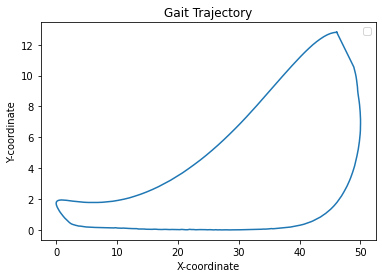

In [28]:
# 3(b) 
# Since the question mentioned CSV file, I have used a CSV file instead of an Excel file
import matplotlib.pyplot as plt
import csv
import math
import numpy as np
x = []
y = []
  
with open('/Users/srujanpandya/Downloads/Gait_DATA.csv','r') as csvfile:
    plots = csv.DictReader(csvfile, delimiter = ',')
    for row in plots:
        x.append(float(row['X (cm)']))
        y.append(float(row['Y (cm)']))   
plt.plot(x,y)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Gait Trajectory')
plt.legend()
plt.show()



In [27]:
# 3(c) 
import csv
import math
import numpy as np
x = []
y = []
  
with open('/Users/srujanpandya/Downloads/Gait_DATA.csv','r') as csvfile:
    plots = csv.DictReader(csvfile, delimiter = ',')
    for row in plots:
        x.append(float(row['X (cm)'])/100)
        y.append(float(row['Y (cm)'])/100) 
# Inverse Kinematics
l_1 = 0.405
l_2 = 0.391
J = []
for i in range(len(x)):
    theta_2 = math.acos((x[i]**2+y[i]**2-l_1**2-l_2**2)/2*l_1*l_2)
    theta_1 = math.atan2(y[i],x[i]) - math.atan2(l_2*math.sin(theta_2),l_1+l_2*math.cos(theta_2))
    j = [theta_1, theta_2]
    J.append(j)
print('Joint Variables')
print(J)
P = []
# Verification through forward kinematics
for i in J:
    x_forward = l_2*math.cos(i[1]+i[0]) + l_1*math.cos(i[0])
    y_forward = l_2*math.sin(i[1]+i[0]) + l_1*math.sin(i[0])
    p = [x,y]
    P.append(p)
x_f = p[0]
y_f = p[1]
print('X_Forward:')
print(x_f)
print('Y_Forward')
print(y_f)
# Checking of the procedure through error analysis
count = 0
for i in range(len(x)):
    if x_f[i]-x[i] > 0.000001 or y_f[i] - y[i] > 0.000001:
        print("Error in some values is greater than 0.01 percent!")
    else:
        count = count + 1
if count == len(x):
    print("All values have error less than 0.0001 %")


Joint Variables
[[-0.500198477522066, 1.5777559340401572], [-0.4981217480582102, 1.5781094614854492], [-0.49639490741097647, 1.5784958991606441], [-0.4952296100025366, 1.5788947092708367], [-0.49459251826273165, 1.579312882216471], [-0.49444679627018057, 1.5797465186935575], [-0.4947254713633574, 1.5801974228426159], [-0.4954550439645683, 1.5806677837040353], [-0.4967674850231856, 1.581138435773056], [-0.49843586218948016, 1.5816249265135378], [-0.5005691728371471, 1.582117148928703], [-0.5030935037194484, 1.582619712411729], [-0.5059739570824147, 1.5831283869221002], [-0.5091915053448923, 1.5836454767871482], [-0.5128099535032302, 1.5841595802089983], [-0.516807775904404, 1.5846780327735364], [-0.5211015413835642, 1.5851957577109483], [-0.5256834007537479, 1.5857119466783944], [-0.5303771746369206, 1.5862265349955], [-0.5354805628845275, 1.5867319807843265], [-0.5407273104016983, 1.5872339250277703], [-0.5460928520369877, 1.5877296312365814], [-0.5515749744541104, 1.588215576366444], 